#View this file on kaggle : https://www.kaggle.com/ariamehr83maleki/mnist-digit-classification

# Introduction

Mnist digit classification is a project involving image recognition wich we have to cassify images of handwritten digits as 0 to 9.

# Import required modules

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

from pylab import plt
plt.style.use ('seaborn')
#import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

keras.backend.set_image_data_format('channels_last')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.utils import plot_model

# Read Directories & Folders

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Load the Data

In [ ]:
mnist_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
mnist_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

display(" train data",mnist_train )
display(" test data",mnist_test )

' train data'

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


' test data'

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [ ]:
# Convert to trian and test data; Preserve original dataset
X_train = mnist_train.drop('label', axis=1).copy()
X_test = mnist_test.copy()
Y_train = mnist_train['label'].copy()

In [ ]:
print (f'The train dataset has shape {X_train.shape} and the labels shape is: {Y_train.shape}')
print (f'The test dataset has shape {X_test.shape}')

The train dataset has shape (42000, 784) and the labels shape is: (42000,)
The test dataset has shape (28000, 784)


In [ ]:
# Reshape to 28 x 28 so that we can see the image ie. handwritten number
# resahping the train inputs to be 4D arrays so we can be able to load them
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

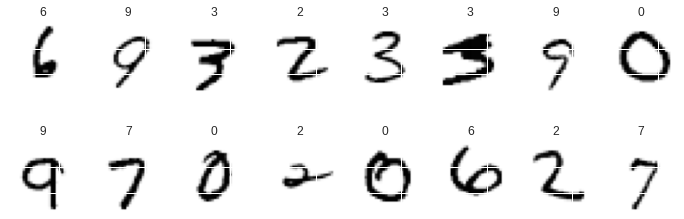

In [ ]:
# plot some of the data with their labels as titles:
fig, ax= plt.subplots (2, 8, figsize= [12,4])
for i in range (2):
    for j in range (8):
        rnd= np.random.randint (len(X_train))
        ax[i, j].imshow (X_train[rnd])
        ax[i, j].set_title (Y_train [rnd])
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])

In [ ]:
# Some preprocess on data:

X_train= X_train.reshape ((X_train.shape[0], -1))  ### flatten the train inputs to be 1D arrays
X_test= X_test.reshape ((X_test.shape[0], -1))     ### flatten the test inputs to be 1D arrays

print (X_train.shape, X_test.shape)

Y_train= to_categorical(Y_train, num_classes=10, dtype="int")   ###  One-hot encode the labels to make them real classes, due to do classification

(42000, 784) (28000, 784)


We will normalize the input dataset. This is generally a good idea to avoide some issues like "nan loss"

In [ ]:
X_train= X_train / 255
X_test= X_test / 255

# A Simple Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
__________________________________________________

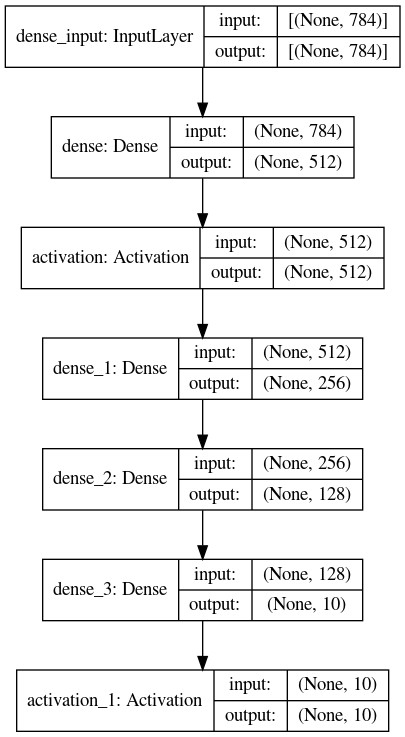

In [ ]:
model= Sequential ()

# INputs and first HIDDEN layer
model.add (Dense (512, input_shape= (X_train.shape[1], )))
model.add (Activation ('relu'))

# HIDDEN layers
model.add (Dense (256))
model.add (Dense (128))

# OUTput
model.add (Dense (10))
model.add (Activation('softmax'))

### Visualize the model's detail
print (model.summary())
plot_model (model, show_shapes=True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history= model.fit (X_train, Y_train, epochs= 50, batch_size= 32, validation_split= 0.3, verbose= 1, callbacks= [])

Epoch 1/50
919/919 [==============================] - 5s 4ms/step - loss: 0.4058 - accuracy: 0.8706 - val_loss: 0.1496 - val_accuracy: 0.9537
Epoch 2/50
919/919 [==============================] - 3s 3ms/step - loss: 0.1164 - accuracy: 0.9636 - val_loss: 0.1329 - val_accuracy: 0.9625
Epoch 3/50
919/919 [==============================] - 3s 3ms/step - loss: 0.0810 - accuracy: 0.9736 - val_loss: 0.1310 - val_accuracy: 0.9639
Epoch 4/50
919/919 [==============================] - 3s 3ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.1260 - val_accuracy: 0.9655
Epoch 5/50
919/919 [==============================] - 3s 3ms/step - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.1281 - val_accuracy: 0.9697
Epoch 6/50
919/919 [==============================] - 4s 4ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 0.1204 - val_accuracy: 0.9733
Epoch 7/50
919/919 [==============================] - 3s 3ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.1544 - val_accuracy: 0.9659
Epoch 

To see how our model is going, we plot "Learning Curves"

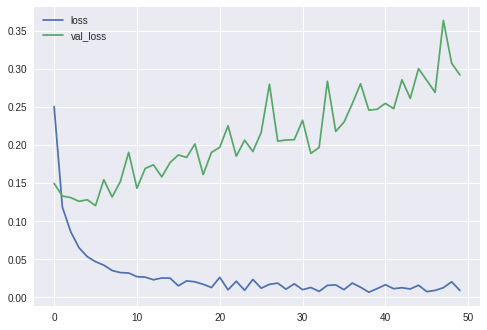

In [ ]:
plt.plot(history.history ['loss'], label= 'loss')
plt.plot(history.history ['val_loss'], label= 'val_loss')

plt.legend ()

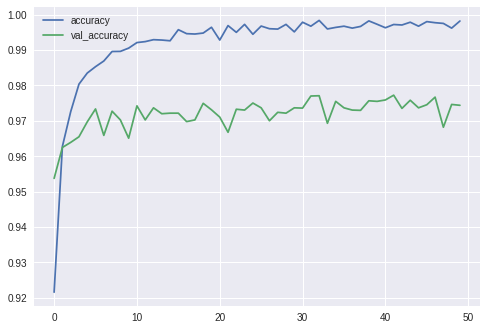

In [ ]:
plt.plot(history.history ['accuracy'], label= 'accuracy')
plt.plot(history.history ['val_accuracy'], label= 'val_accuracy')

plt.legend ()

In [ ]:
results = model.predict(X_test)

# select the indices with the maximum probability
results = np.argmax(results,axis = 1) 
results = pd.Series(results,name="Label")
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64